# Compositing

**Compositing** is one of the simplest analysis techniques imaginable and is often used as an alternative to linear regression. It is very powerful, but can also be [misused](https://www.nature.com/articles/srep29599). 

In essence, compositing involves sorting data into categories and comparing the statistics for different categories. 

The idea is by categorizing and averaging the data in a way that reflects the hypothesis you are testing, you can isolate the signal and remove some of the background “noise”.

## Compositing Steps:

**1. Determine categories**

Typically, compositing involves sorting data into **two** categories or groups based on an *a priori* hypothesis as to why the variable being composited should depend on the category. 

For example, suppose that you want to test the hypothesis that a paricular variable is significantly different at mid-day versus very early morning. You would then sort your data into the two specific times of day that you are interested in and compare the statistics for these two groups. 

Other examples include:

- you hypothesize that ENSO has an impact on California precipitation
    - you categorize your precipitation data based on the phase on ENSO: La Niña and El Niño
- you hypothesize that sea ice loss has an impact on extreme cold events in Toronto
    - you categorize your temperature data based on years with high or low sea ice extent


**2. Compute the statistics for each category**

Typically, we are computing the sample means and standard deviations for each category and testing whether there is a significant difference between the sample means using a $z$/$t$-test or resampling, assuming a null hypothesis that there is no difference.

**3. Validate Results**

With composite analysis, it is always pertinent to check the robustness of your results. You can do this is a few ways:

- subdivide the data and show whether the relationship exists in sub-samples of the data
- perform the opposite composite analysis: e.g. categorize ENSO data based on two categories of high and low California precipitation.

Let's take a look at compositing our California precipitation data based on the phase of ENSO. Recall, that we have already identified these data points in our previous scatter plots using blue and red colour-coding.

First, we need to load the data.

In [1]:
# load packages
import numpy as np
import pickle as pickle
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16,weight='bold') #set default font size and weight for plots

In [2]:
# ENSO Data:
# unpickle NINO34 (units of degC)
with open('NINO34_NDJF_2021.pickle','rb') as fp: #.pickle files are a python file type
    nino34 = pickle.load(fp,encoding='latin1')

#  Precipitation Data:
#  unpickle CA_PRECIP_DJFM (units of mm/day)
with open('CA_PRECIP_DJFM.pickle','rb') as fp: #.pickle files are a python file type
    precip_djfm = pickle.load(fp,encoding='latin1')

To categorize the data based on the phase of ENSO, we need to load the data that identifies El Niño and La Niña events.

In [3]:
# unpickle data indicating strong El Niño/La Niña years
with open('ENSO_NDJF_years_rev.pickle','rb') as fp:   #another .pickle file
    elnino_yrs,lanina_yrs = pickle.load(fp,encoding='latin1')

We now create composites of precipitation based on the phase on ENSO.

In [4]:
# create composites of precipitation based on El Niño/La Niña years
ElNinoP = precip_djfm[np.squeeze(elnino_yrs)]
LaNinaP = precip_djfm[np.squeeze(lanina_yrs)]

The composite means of these two groups are:

In [5]:
# compute composite means
print(np.round(np.mean(ElNinoP),2), np.round(np.mean(LaNinaP),2))

3.18 2.04


They are different, but are they significantly different? Let's do a $t$-test to find out.

In [6]:
# two-sample t-test
composite_ttest = st.ttest_ind(ElNinoP,LaNinaP)
print(composite_ttest)

Ttest_indResult(statistic=16.309292974049395, pvalue=3.600284735805449e-50)


Yes, we find a significant difference between the two composites indicating that the phase of ENSO likely has an impact on California precipitation.

We can plot the results in different ways, for example, a bar plot including the confidence intervals.

Text(0.5, 1.0, 'Composite Analysis of CA Precipitation')

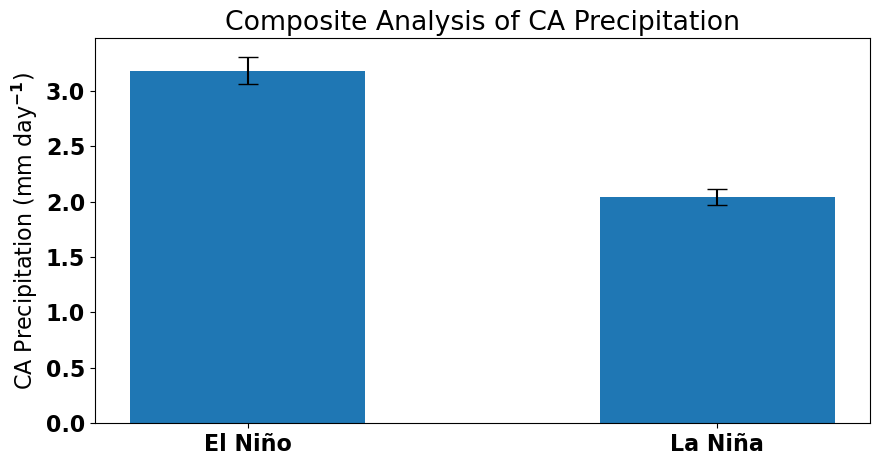

In [7]:
# confidence interval critical t-values
t_crit1 = st.t.ppf(0.975,len(ElNinoP)-1)
t_crit2 = st.t.ppf(0.975,len(LaNinaP)-1)

# plot composite means as bar plot
labels = ["El Niño", "La Niña"]
means = [np.mean(ElNinoP), np.mean(LaNinaP)]
error = [t_crit1*np.std(ElNinoP,ddof=1)/np.sqrt(len(ElNinoP)),t_crit2*np.std(LaNinaP,ddof=1)/np.sqrt(len(LaNinaP))]
barWidth = 0.5

plt.figure(figsize = (10,5))
plt.bar(labels,means,width = barWidth,yerr = error,capsize=7)
plt.ylabel("CA Precipitation (mm day$^{-1}$)")
plt.title("Composite Analysis of CA Precipitation")

Similar to our linear regression analysis, we find that California precipitation depends on ENSO, with more (less) precipitation occuring when the tropical Pacific is in an El Niño (La Niña) phase.

## Compositing versus Regression

As mentioned above, compositing is often used as an alternative to linear regression. Here are a few pros and cons of compositing.

**Advantages of compositing over regression:**
- compositing can isolate nonlinear relationships
- no assumptions need to be made about the underlying distributions (if $N$ is sufficiently large or if using resampling techniques)

**Disadvantages of compositing over regression:**
- compositing does not use all of the data (reduces $N$)
- compositing tends to focus on the “extremes” of each category